# Predicting Blue-Chip Company Financial Trajectory

**Objective**

Our objective is to measure a company’s financial health and performance trajectory indicated by whether it is a *Growth* or *Non-Growth* company and based on predicted financial metrics, such as *stock price*, *revenue*, and *EBITDA margins*. The financial metrics worked with are from 10-K reports from 2009-2023 of 12 investment grade companies.

In [43]:
# imports

import numpy as np
import pandas as pd

# Data Exploration

In [44]:
# load data
df = pd.read_csv('/content/FinancialGrowthMetrics.csv')
df.head()

,Year,Company,Category,EBIDTA Margins (%),Revenue,Revenue Growth,Gross Profit,EBITDA,EBITDA Growth,Cash Flow from Operations,Cash Flow From Operations % of Sales,Modified Free Cash Flow,EBITDA per Employee,Debt/Equity Ratio,Number of Employees
0,2023,AAPL,IT,0.331047,394328.0,7.793788,170782.0,"$130,541",8.573353,122151.0,0.309770,122151.0,0.795982,2.3695,164000.0
1,2022,AAPL,IT,0.328670,365817.0,33.259385,152836.0,120233,55.452265,104038.0,0.284399,104038.0,0.780734,1.9768,154000.0
2,2021,AAPL,IT,0.281748,274515.0,5.512080,104956.0,77344,1.133674,80674.0,0.293878,80674.0,0.526150,1.7208,147000.0
3,2020,AAPL,IT,0.293946,260174.0,-2.041078,98392.0,76477,-6.508478,69391.0,0.266710,69391.0,0.558226,1.1940,137000.0
4,2019,AAPL,IT,0.307991,265595.0,15.861958,101839.0,81801,14.405393,77434.0,0.291549,77434.0,0.619705,1.0685,132000.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  190 non-null    int64  
 1   Company                               160 non-null    object 
 2   Category                              160 non-null    object 
 3   EBIDTA Margins (%)                    160 non-null    float64
 4   Revenue                               160 non-null    float64
 5   Revenue Growth                        148 non-null    float64
 6   Gross Profit                          160 non-null    float64
 7   EBITDA                                160 non-null    object 
 8   EBITDA Growth                         148 non-null    float64
 9   Cash Flow from Operations             160 non-null    float64
 10  Cash Flow From Operations % of Sales  160 non-null    float64
 11  Modified Free Cash 

< Explanation on how the data is imbalanced >

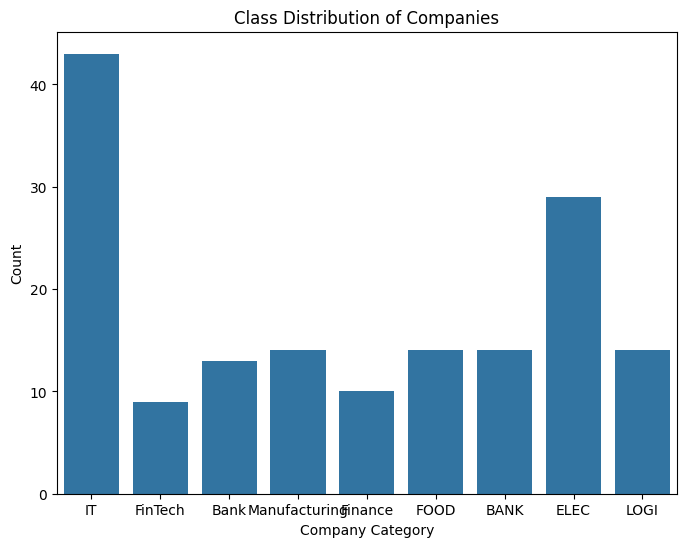

In [46]:
# class distribution visualization

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title("Class Distribution of Companies")
plt.xlabel("Company Category")
plt.ylabel("Count")
plt.show()

< Explanation on which cleaning & sampling methods are chosen along the lines of ... >

1. Is there missing data? If so, how are we handling the missing data (impute/delete/k-nearest/etc.)
2. How will we clean & sample the data?

In [47]:
# show missing data (i.e. using isnull())
df.isnull().sum()

,0
Year,0
Company,30
Category,30
EBIDTA Margins (%),30
Revenue,30
Revenue Growth,42
Gross Profit,30
EBITDA,30
EBITDA Growth,42
Cash Flow from Operations,30


In [61]:
# Clean column names by removing any leading/trailing spaces
df.columns = df.columns.str.strip()

# Check if the column names are now clean
print(df.columns)

# Impute missing 'Company' with the most frequent category (mode)
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])

# Impute missing 'EBIDTA Margins (%)' by category
df['EBIDTA Margins (%)'] = df.groupby('Category')['EBIDTA Margins (%)'].transform(lambda x: x.fillna(x.mean()))

# Impute other missing numerical columns by category as before
numerical_columns = ['EBITDA', 'EBIDTA Margins (%)', 'Revenue', 'Gross Profit', 'Cash Flow from Operations',
                     'Cash Flow From Operations % of Sales', 'Modified Free Cash Flow', 'EBITDA per Employee',
                     'Debt/Equity Ratio', 'Number of Employees']

# Apply imputation for other columns
df = impute_by_category(df, 'Category', numerical_columns)

# Verify if missing values have been handled
print(df.isnull().sum())


Index(['Year', 'Company', 'Category', 'EBIDTA Margins (%)', 'Revenue',
       'Revenue Growth', 'Gross Profit', 'EBITDA', 'EBITDA Growth',
       'Cash Flow from Operations', 'Cash Flow From Operations % of Sales',
       'Modified Free Cash Flow', 'EBITDA per Employee', 'Debt/Equity Ratio',
       'Number of Employees'],
      dtype='object')
Year                                    0
Company                                 0
Category                                0
EBIDTA Margins (%)                      0
Revenue                                 0
Revenue Growth                          0
Gross Profit                            0
EBITDA                                  0
EBITDA Growth                           0
Cash Flow from Operations               0
Cash Flow From Operations % of Sales    0
Modified Free Cash Flow                 0
EBITDA per Employee                     0
Debt/Equity Ratio                       0
Number of Employees                     0
dtype: int64


# Data Analysis and Visualization

< Explanation on which visualizations and why >

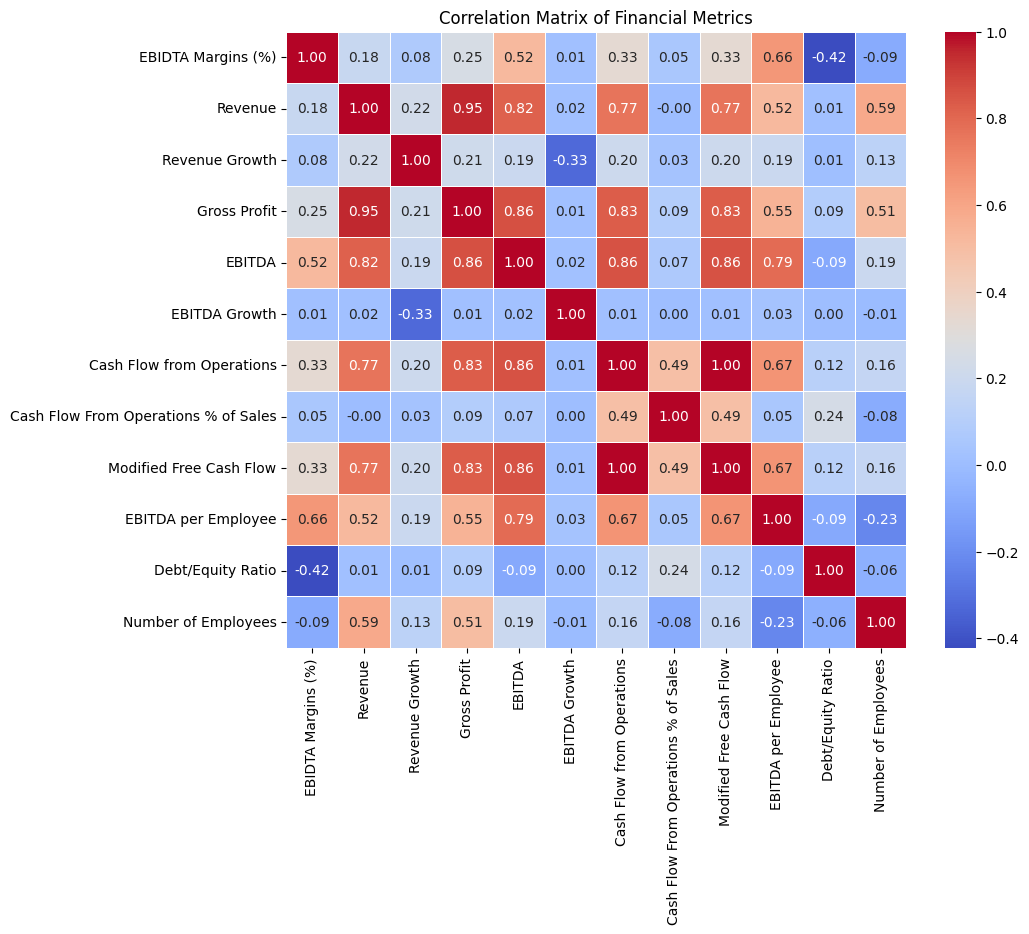

In [63]:
# correlation, histogram, etc

# Select numerical columns
numerical_columns = ['EBIDTA Margins (%)', 'Revenue', 'Revenue Growth', 'Gross Profit',
                     'EBITDA', 'EBITDA Growth', 'Cash Flow from Operations',
                     'Cash Flow From Operations % of Sales', 'Modified Free Cash Flow',
                     'EBITDA per Employee', 'Debt/Equity Ratio', 'Number of Employees']

# Compute the correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

**Observations**

< Explanation on
1. Which financial metrics are correlated
2. Why are they correlated >

# Pre-Processing

**Expectations**

Most blue-chip companies perform well; therefore, companies entering bankruptcy or restructuring events will be the minority class. Techniques will be preformed to handle the imbalanced data, including stratified splitting and resampling.

## Splitting the data

**Rationale**

< Explanation on which methods are used along the lines of...

1. Which split we are using (probably 80/20 right?)
2. Why we use stratified splitting (i.e. we have imbalanced data and want to preserve the original dataset proportions). >

In [64]:
# split data into development and test sets

from sklearn.model_selection import train_test_split

# Stratified split to preserve class distribution in both training and testing datasets
X = df[numerical_columns]  # Features (excluding 'Category')
y = df['Category']  # Target variable

# Perform the stratified split with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the class distribution in the split datasets
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Category
IT               59
ELEC             23
BANK             11
Bank             11
Manufacturing    11
LOGI             11
FOOD             11
Finance           8
FinTech           7
Name: count, dtype: int64

Test set class distribution:
Category
IT               14
ELEC              6
FOOD              3
Manufacturing     3
BANK              3
LOGI              3
Bank              2
FinTech           2
Finance           2
Name: count, dtype: int64


## Processing the data
<Explanation on which methods are used>

In [51]:
# encoding/scaling as needed

# wont require encoding

# Classification

## SMOTE

In [52]:
# Resampling techniques

**Rationale**

Which resampling technique is best and why

## Train the Model

In [53]:
# model part

## Evaluation

In [54]:
# scores

In [55]:
# Confusion Matrix

< Explanation on Confusion Matrix results and Accuracy, Precision, Recall, F1 scores >

# Regression

## Train the Model

In [56]:
# model part

## Hyperparameter Tuning

## Evaluation

In [57]:
# accuracy scores